<a href="https://colab.research.google.com/github/LILY-182/ml-clustering-customer-segmentation/blob/main/Machine_learningclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### UNSUPERVISED MACHINE LEARNING
This type of learning, the model is trained on data that doesnt have labelled responses. The main goal is to uncover hidden patterns, structures, relationships within the data.
####Types of unsupervised learning
1.clustering: goal is to group similar data points together based on their similar features e.g safaricom customers have been grouped into:

a) SMS services: send promotional sms updates that only targets these customer

b)call services

c)data bundles subscribers

clustering uses the following algorithms:

1. K-Means -> where groupings is done based on similarities of the mean.It only works on mumerical data e.g mean age

2. K-Model -> Grouped based on categorical data e.g gender, location...

3. K-Prototype -> grouping is done based on BOTH numerical(mean) and categorical(mode)

###Applications of clustering

1. Market/cutomer segmentation.
2. Image segementation
3. Social network analysis


2.Association rule mining
checking relationships btwn variables using a concept called basket analysis

In [27]:
#clustering using -> K-MEANS ALGORITHM
#customer segmentation
#unsupervised learning

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#read the file
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0


In [30]:
#stats
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,199.000000,197.000000
mean,100.500000,38.850000,60.356784,50.324873
std,57.879185,13.969007,26.172859,25.639097
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.000000,35.000000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.isnull().sum()

,0
CustomerID,0
Gender,4
Age,0
Annual Income,1
Spending Score,3


In [32]:
df.dropna(inplace=True)
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


In [33]:
df[['Age','Annual Income', 'Spending Score']].corr()
#we use [[]] becsuae its a multi dimension array if you pick more than one column

,Age,Annual Income,Spending Score
Age,1.000000,-0.005096,-0.333296
Annual Income,-0.005096,1.000000,0.037084
Spending Score,-0.333296,0.037084,1.000000


In [34]:
#get a subset to inlude age, income and spending
subset = df[['Age','Annual Income', 'Spending Score']]

In [35]:
#Machine learning
#STEP 1: get the x
array = subset.values
X = array[:, :]
X

array([[ 19.,  15.,  39.],
       [ 21.,  15.,  81.],
       [ 20.,  16.,   6.],
       [ 23.,  16.,  77.],
       [ 31.,  17.,  40.],
       [ 22.,  17.,  76.],
       [ 35.,  18.,   6.],
       [ 23.,  18.,  94.],
       [ 64.,  19.,   3.],
       [ 30.,  19.,  72.],
       [ 67.,  19.,  14.],
       [ 35.,  19.,  99.],
       [ 58.,  20.,  15.],
       [ 24.,  20.,  77.],
       [ 37.,  20.,  13.],
       [ 22.,  20.,  79.],
       [ 35.,  21.,  35.],
       [ 20.,  21.,  66.],
       [ 52.,  23.,  29.],
       [ 35.,  23.,  98.],
       [ 35.,  24.,  35.],
       [ 25.,  24.,  73.],
       [ 46.,  25.,   5.],
       [ 31.,  25.,  73.],
       [ 54.,  28.,  14.],
       [ 29.,  28.,  82.],
       [ 45.,  28.,  32.],
       [ 35.,  28.,  61.],
       [ 40.,  29.,  31.],
       [ 23.,  29.,  87.],
       [ 60.,  30.,   4.],
       [ 21.,  30.,  73.],
       [ 53.,  33.,   4.],
       [ 18.,  33.,  92.],
       [ 49.,  33.,  14.],
       [ 21.,  33.,  81.],
       [ 42.,  34.,  17.],
 

In [45]:
#STEP 2: get the model and fit the data X n+clusters = number of clusters
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, random_state=42)
model.fit(X)

KMeans(random_state=42)

In [37]:
#STEP 3: getting cluster centers(centronoids)
centroids = model.cluster_centers_
clusters = pd.DataFrame(centroids, columns=['Age','Annual Income', 'Spending Score'])
clusters

,Age,Annual Income,Spending Score
0,46.950000,91.550000,19.800000
1,55.777778,53.844444,48.622222
2,32.580645,80.451613,82.709677
3,44.142857,25.142857,19.523810
4,25.272727,25.727273,79.363636
5,30.250000,76.000000,12.083333
6,27.400000,55.657143,50.000000
7,33.833333,117.000000,80.166667


In [38]:
#STEP 4: getting the cluster members
df['Group'] = model.labels_
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Group
0,1,Male,19,15.0,39.0,3
1,2,Male,21,15.0,81.0,4
2,3,Female,20,16.0,6.0,3
3,4,Female,23,16.0,77.0,4
4,5,Female,31,17.0,40.0,3


In [43]:
#filter datafarme based on the group
# group 2 members
condition = df['Group'] == 2
group2 = df[condition]
group2

,CustomerID,Gender,Age,Annual Income,Spending Score,Group
123,124,Male,39,69.0,91.0,2
125,126,Female,31,70.0,77.0,2
127,128,Male,40,71.0,95.0,2
129,130,Male,38,71.0,75.0,2
131,132,Male,39,71.0,75.0,2
133,134,Female,31,72.0,71.0,2
135,136,Female,29,73.0,88.0,2
137,138,Male,32,73.0,73.0,2
139,140,Female,35,74.0,72.0,2
141,142,Male,32,75.0,93.0,2


In [40]:
#group 3 members
condition = df['Group'] == 3
group3 = df[condition]
group3.to_csv('group3.csv')


In [41]:
#getting optimal number of clusters
#elbow method
#inertia -> we reach the optimal number when the inertia is lower, normally near the elbow arm
from sklearn.cluster import KMeans
inertias = []
for k in range(2,15):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X)
  inertias.append(model.inertia_)

print(inertias)

[198776.4942350334, 138212.1292948271, 99105.01037415837, 70552.75165103699, 54355.6250278347, 47360.08478360379, 43710.297751710656, 39360.43077812991, 36573.29811344328, 33121.29490020212, 30988.38460317461, 28329.682323842335, 27178.03089256356]


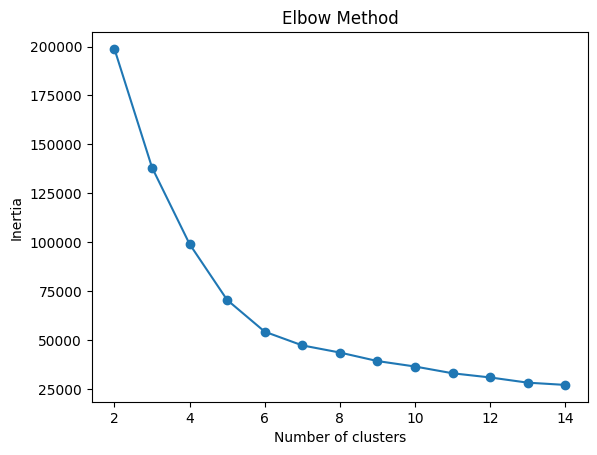

In [42]:
#plot the inertias
plt.plot(range(2,15), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()